<a href="https://colab.research.google.com/github/danielleitesoares/tccuea/blob/main/2020_trim02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>Universidade do Estado do Amazonas</center>
##### <center>Pós-graduação Lato Sensu em Ciência de Dados</center>

<center>

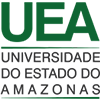

</center>

---

## <center>Código fonte do TCC: Análise dos dados 2º Trimestre de 2020</center>
##### <center>**Orientadora:** Msc. Alice Adativa</center>
###### <center>**Aluno:** Daniel Erasmo Leite Soares</center>



---



## <center>Fonte de dados.</center>

[DB Queimadas do INPE.](https://queimadas.dgi.inpe.br/queimadas/bdqueimadas)


## **Preparação do Ambiente**

---



In [1]:
# Pacotes instalados
!pip install geopandas
!pip install contextily
!pip install biokit
!pip install plotly

     |████████████████████████████████| 1.0 MB 4.3 MB/s 
     |████████████████████████████████| 16.7 MB 56.4 MB/s 
     |████████████████████████████████| 6.3 MB 53.1 MB/s 
     |████████████████████████████████| 19.3 MB 1.3 MB/s 
     |████████████████████████████████| 162 kB 4.3 MB/s 
     |████████████████████████████████| 47 kB 4.6 MB/s 
     |████████████████████████████████| 1.0 MB 44.4 MB/s 
     |████████████████████████████████| 2.3 MB 50.0 MB/s 
     |████████████████████████████████| 51 kB 261 kB/s 
     |████████████████████████████████| 47 kB 5.2 MB/s 
     |████████████████████████████████| 144 kB 73.6 MB/s 
     |████████████████████████████████| 5.8 MB 50.6 MB/s 
     |████████████████████████████████| 251 kB 51.8 MB/s 
     |████████████████████████████████| 127 kB 70.9 MB/s 
  Created wheel for biokit: filename=biokit-0.5.0-py3-none-any.whl size=177148 sha256=e7d0280797717bb61108aab86ecc4de6b97b4ec68eece60616d29cb4e56ac750
  Stored in directory: /root/.cache/pip/whee

In [2]:
## Bibliotecas de Tratamento de Dados
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import contextily
import numpy as np

## Bibliotecas Gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go

## Bibliotecas de ML
from sklearn.cluster import KMeans

## **Carregamento e preparação do DataFrame de todos os Biomas**

---



In [3]:
# Montando a pasta do Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Criando os DataFrames de alertas de focos de queimadas do Brasil
alertas = pd.read_csv('/content/drive/MyDrive/TCC/dataset/meses_focos_biomas_2020-01-01_2020-12-31.csv')

## **Preparação do DataFrame somente do Bioma Amazônia**

---



In [5]:
alertas_amazonia = alertas[alertas['bioma'] == 'Amazonia']

## **Preparação do DataFrame com dados do 2º trimestre 2020**

---



In [6]:
alertas_m04 = alertas_amazonia[alertas_amazonia['mes'] == 4]
alertas_m05 = alertas_amazonia[alertas_amazonia['mes'] == 5]
alertas_m06 = alertas_amazonia[alertas_amazonia['mes'] == 6]

alertas_todos = [alertas_m04, alertas_m05, alertas_m06]
alertas_trim02 = pd.concat(alertas_todos)

In [7]:
alertas_trim02

,mes,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
1551,4,2020/04/02 17:15:00,AQUA_M-T,Brasil,MATO GROSSO,RIBEIRAO CASCALHEIRA,Amazonia,5.0,0.1,0.4,-12.532,-52.032,12.5
1552,4,2020/04/02 17:15:00,AQUA_M-T,Brasil,MATO GROSSO,GAUCHA DO NORTE,Amazonia,4.0,2.9,0.2,-13.072,-53.218,10.3
1553,4,2020/04/02 17:15:00,AQUA_M-T,Brasil,MATO GROSSO,NOVA UBIRATA,Amazonia,3.0,1.0,0.2,-13.081,-54.785,14.2
1554,4,2020/04/02 17:15:00,AQUA_M-T,Brasil,MATO GROSSO,QUERENCIA,Amazonia,4.0,0.2,0.4,-13.128,-52.274,12.8
3255,4,2020/04/14 17:45:00,AQUA_M-T,Brasil,RORAIMA,PACARAIMA,Amazonia,5.0,0.0,1.0,4.172,-60.629,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222744,6,2020/06/12 17:20:00,AQUA_M-T,Brasil,PARA,SANTANA DO ARAGUAIA,Amazonia,14.0,0.0,1.0,-9.590,-50.517,56.5
222745,6,2020/06/12 17:20:00,AQUA_M-T,Brasil,PARA,SANTANA DO ARAGUAIA,Amazonia,13.0,0.0,0.4,-9.595,-50.495,44.0
222746,6,2020/06/12 17:20:00,AQUA_M-T,Brasil,PARA,SANTANA DO ARAGUAIA,Amazonia,14.0,0.0,1.0,-9.597,-50.510,129.0
222747,6,2020/06/12 17:20:00,AQUA_M-T,Brasil,PARA,SANTANA DO ARAGUAIA,Amazonia,14.0,0.0,0.7,-9.599,-50.500,68.8


## **Criação o GeoDataFrame e Sistema de Referência de Coordenadas**
---



In [8]:
geometry = [Point(xy) for xy in zip(alertas_trim02['longitude'], alertas_trim02['latitude'])]

In [9]:
alertas_trim02 = gpd.GeoDataFrame(alertas_trim02, crs='EPSG:4326', geometry=geometry)

In [10]:
type(alertas_trim02)

geopandas.geodataframe.GeoDataFrame

In [11]:
alertas_trim02

,mes,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,geometry
1551,4,2020/04/02 17:15:00,AQUA_M-T,Brasil,MATO GROSSO,RIBEIRAO CASCALHEIRA,Amazonia,5.0,0.1,0.4,-12.532,-52.032,12.5,POINT (-52.03200 -12.53200)
1552,4,2020/04/02 17:15:00,AQUA_M-T,Brasil,MATO GROSSO,GAUCHA DO NORTE,Amazonia,4.0,2.9,0.2,-13.072,-53.218,10.3,POINT (-53.21800 -13.07200)
1553,4,2020/04/02 17:15:00,AQUA_M-T,Brasil,MATO GROSSO,NOVA UBIRATA,Amazonia,3.0,1.0,0.2,-13.081,-54.785,14.2,POINT (-54.78500 -13.08100)
1554,4,2020/04/02 17:15:00,AQUA_M-T,Brasil,MATO GROSSO,QUERENCIA,Amazonia,4.0,0.2,0.4,-13.128,-52.274,12.8,POINT (-52.27400 -13.12800)
3255,4,2020/04/14 17:45:00,AQUA_M-T,Brasil,RORAIMA,PACARAIMA,Amazonia,5.0,0.0,1.0,4.172,-60.629,12.4,POINT (-60.62900 4.17200)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222744,6,2020/06/12 17:20:00,AQUA_M-T,Brasil,PARA,SANTANA DO ARAGUAIA,Amazonia,14.0,0.0,1.0,-9.590,-50.517,56.5,POINT (-50.51700 -9.59000)
222745,6,2020/06/12 17:20:00,AQUA_M-T,Brasil,PARA,SANTANA DO ARAGUAIA,Amazonia,13.0,0.0,0.4,-9.595,-50.495,44.0,POINT (-50.49500 -9.59500)
222746,6,2020/06/12 17:20:00,AQUA_M-T,Brasil,PARA,SANTANA DO ARAGUAIA,Amazonia,14.0,0.0,1.0,-9.597,-50.510,129.0,POINT (-50.51000 -9.59700)
222747,6,2020/06/12 17:20:00,AQUA_M-T,Brasil,PARA,SANTANA DO ARAGUAIA,Amazonia,14.0,0.0,0.7,-9.599,-50.500,68.8,POINT (-50.50000 -9.59900)


In [12]:
alertas_trim02 = alertas_trim02.to_crs(crs='EPSG:3857')

## **Geração dos gráficos de quantitativos e localização dos focos por Estado**

In [13]:
alertas_trim02.crs.to_string()

'EPSG:3857'

In [14]:
alertas_trim02['estado'].unique()

array(['MATO GROSSO', 'RORAIMA', 'AMAZONAS', 'PARA', 'RONDONIA',
       'TOCANTINS', 'ACRE', 'MARANHAO', 'AMAPA'], dtype=object)

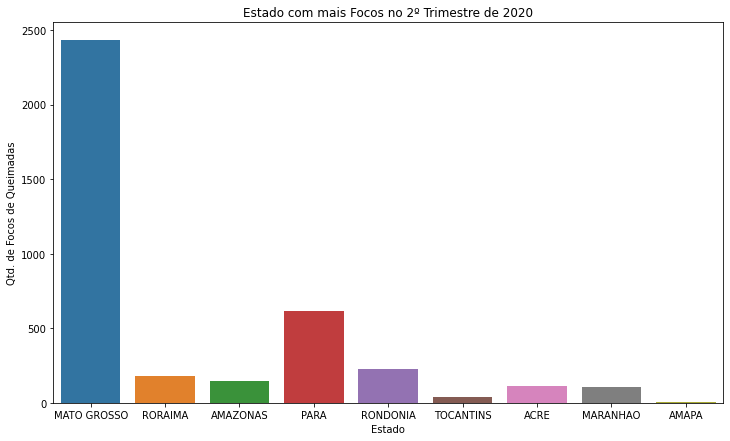

In [25]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x='estado', data=alertas_trim02)
ax.set_title("Estado com mais Focos no 2º Trimestre de 2020")
ax.set_xlabel('Estado')
ax.set_ylabel('Qtd. de Focos de Queimadas')
plt.show()

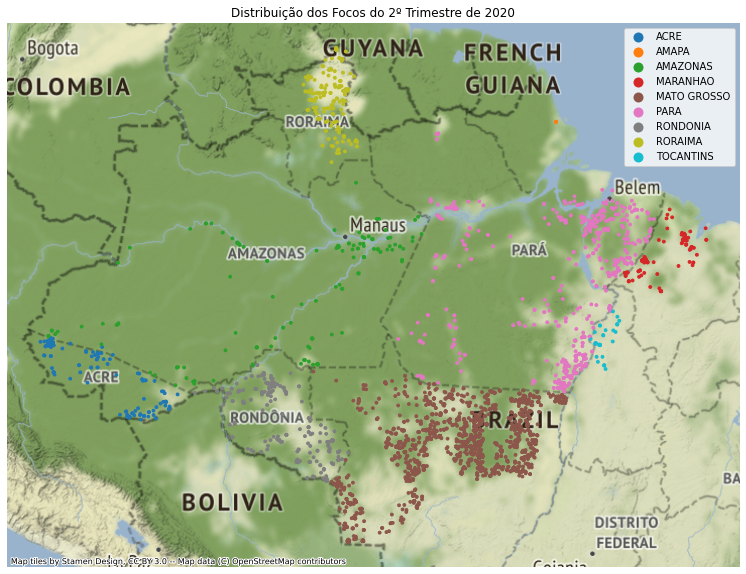

In [26]:
ax = alertas_trim02.plot(figsize=(15, 10), column='estado', markersize=8, legend=True)
contextily.add_basemap(ax)
ax.set_axis_off()
ax.set_title("Distribuição dos Focos do 2º Trimestre de 2020")
plt.show()

## **Aplicação dos Algoritmo K-Means**


*   K-Means

**K-Means Para o Bioma Amazônia**

In [17]:
coord_amazonia = alertas_trim02.drop(columns=["datahora","satelite","pais","estado","municipio","bioma","diasemchuva","precipitacao","riscofogo","frp","geometry"])

In [18]:
coord_amazonia

,mes,latitude,longitude
1551,4,-12.532,-52.032
1552,4,-13.072,-53.218
1553,4,-13.081,-54.785
1554,4,-13.128,-52.274
3255,4,4.172,-60.629
...,...,...,...
222744,6,-9.590,-50.517
222745,6,-9.595,-50.495
222746,6,-9.597,-50.510
222747,6,-9.599,-50.500


In [19]:
agrupadorK = KMeans(n_clusters=9)

In [20]:
agrupadorK.fit(coord_amazonia)

KMeans(n_clusters=9)

In [21]:
np.unique(agrupadorK.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [22]:
coord_amazonia['Grupo'] = agrupadorK.labels_

In [23]:
coord_amazonia

,mes,latitude,longitude,Grupo
1551,4,-12.532,-52.032,2
1552,4,-13.072,-53.218,2
1553,4,-13.081,-54.785,2
1554,4,-13.128,-52.274,2
3255,4,4.172,-60.629,4
...,...,...,...,...
222744,6,-9.590,-50.517,7
222745,6,-9.595,-50.495,7
222746,6,-9.597,-50.510,7
222747,6,-9.599,-50.500,7


**Gráfico com agrupamento por Cluster**

In [24]:
from seaborn.utils import locator_to_legend_entries
c0lat = coord_amazonia[coord_amazonia['Grupo']==0]['latitude']
c0lon = coord_amazonia[coord_amazonia['Grupo']==0]['longitude']
c1lat = coord_amazonia[coord_amazonia['Grupo']==1]['latitude']
c1lon = coord_amazonia[coord_amazonia['Grupo']==1]['longitude']
c2lat = coord_amazonia[coord_amazonia['Grupo']==2]['latitude']
c2lon = coord_amazonia[coord_amazonia['Grupo']==2]['longitude']
c3lat = coord_amazonia[coord_amazonia['Grupo']==3]['latitude']
c3lon = coord_amazonia[coord_amazonia['Grupo']==3]['longitude']
c4lat = coord_amazonia[coord_amazonia['Grupo']==4]['latitude']
c4lon = coord_amazonia[coord_amazonia['Grupo']==4]['longitude']
c5lat = coord_amazonia[coord_amazonia['Grupo']==5]['latitude']
c5lon = coord_amazonia[coord_amazonia['Grupo']==5]['longitude']
c6lat = coord_amazonia[coord_amazonia['Grupo']==6]['latitude']
c6lon = coord_amazonia[coord_amazonia['Grupo']==6]['longitude']
c7lat = coord_amazonia[coord_amazonia['Grupo']==7]['latitude']
c7lon = coord_amazonia[coord_amazonia['Grupo']==7]['longitude']
c8lat = coord_amazonia[coord_amazonia['Grupo']==8]['latitude']
c8lon = coord_amazonia[coord_amazonia['Grupo']==8]['longitude']

x0 = c0lat 
y0 = c0lon
x1 = c1lat
y1 = c1lon
x2 = c2lat
y2 = c2lon
x3 = c3lat
y3 = c3lon
x4 = c4lat
y4 = c4lon
x5 = c5lat
y5 = c5lon
x6 = c6lat
y6 = c6lon
x7 = c7lat
y7 = c7lon
x8 = c8lat
y8 = c8lon

# Create figure
fig = go.Figure()

# Add traces
fig.add_trace(
    go.Scatter(
        x=x0,
        y=y0,
        mode="markers",
        marker=dict(color="paleturquoise")
    )
)

fig.add_trace(
    go.Scatter(
        x=x1,
        y=y1,
        mode="markers",
        marker=dict(color="limegreen")
    )
)

fig.add_trace(
    go.Scatter(
        x=x2,
        y=y2,
        mode="markers",
        marker=dict(color="tomato")
    )
)

fig.add_trace(
    go.Scatter(
        x=x3,
        y=y3,
        mode="markers",
        marker=dict(color="dodgerblue")
    )
)

fig.add_trace(
    go.Scatter(
        x=x4,
        y=y4,
        mode="markers",
        marker=dict(color="rebeccapurple")
    )
)

fig.add_trace(
    go.Scatter(
        x=x5,
        y=y5,
        mode="markers",
        marker=dict(color="yellow")
    )
)

fig.add_trace(
    go.Scatter(
        x=x6,
        y=y6,
        mode="markers",
        marker=dict(color="chartreuse")
    )
)

fig.add_trace(
    go.Scatter(
        x=x7,
        y=y7,
        mode="markers",
        marker=dict(color="chocolate")
    )
)

fig.add_trace(
    go.Scatter(
        x=x8,
        y=y8,
        mode="markers",
        marker=dict(color="red")
    )
)


# Add buttons that add shapes
cluster0 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x0), y0=min(y0),
                            x1=max(x0), y1=max(y0),
                            line=dict(color="paleturquoise"))]
cluster1 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x1), y0=min(y1),
                            x1=max(x1), y1=max(y1),
                            line=dict(color="limegreen"))]
cluster2 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x2), y0=min(y2),
                            x1=max(x2), y1=max(y2),
                            line=dict(color="tomato"))]
cluster3 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x3), y0=min(y3),
                            x1=max(x3), y1=max(y3),
                            line=dict(color="dodgerblue"))]
cluster4 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x4), y0=min(y4),
                            x1=max(x4), y1=max(y4),
                            line=dict(color="rebeccapurple"))]
cluster5 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x5), y0=min(y5),
                            x1=max(x5), y1=max(y5),
                            line=dict(color="yellow"))]
cluster6 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x6), y0=min(y6),
                            x1=max(x6), y1=max(y6),
                            line=dict(color="chartreuse"))]
cluster7 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x7), y0=min(y7),
                            x1=max(x7), y1=max(y7),
                            line=dict(color="chocolate"))]
cluster8 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x8), y0=min(y8),
                            x1=max(x8), y1=max(y8),
                            line=dict(color="red"))]
fig.update_layout(
    updatemenus=[
        dict(buttons=list([
            dict(label="None",
                 method="relayout",
                 args=["shapes", []]),
            dict(label="Cluster 0",
                 method="relayout",
                 args=["shapes", cluster0]),
            dict(label="Cluster 1",
                 method="relayout",
                 args=["shapes", cluster1]),
            dict(label="Cluster 2",
                 method="relayout",
                 args=["shapes", cluster2]),
            dict(label="Cluster 3",
                 method="relayout",
                 args=["shapes", cluster3]),
            dict(label="Cluster 4",
                 method="relayout",
                 args=["shapes", cluster4]),
            dict(label="Cluster 5",
                 method="relayout",
                 args=["shapes", cluster5]),
            dict(label="Cluster 6",
                 method="relayout",
                 args=["shapes", cluster6]),
            dict(label="Cluster 7",
                 method="relayout",
                 args=["shapes", cluster7]),
            dict(label="Cluster 8",
                 method="relayout",
                 args=["shapes", cluster8]),
            dict(label="All",
                 method="relayout",
                 args=["shapes", cluster0 + cluster1 + cluster2 + cluster3 + cluster4 + cluster5 + cluster6 + cluster7 + cluster8])
        ]),
        )
    ]
)

# Update remaining layout properties
fig.update_layout(
     title_text="Clusters do 2º Trimestre de 2020",
    showlegend=False,
)
fig.show()
